#### Randomized Treap Implementation

Implementation of a basic randomized treap. Nodes are assigned priority values uniformly at random from $[0,1]$ 

In [44]:
from graphviz import Digraph, Source

class Node:
    def __init__(self, data, key, priority, parent=None):
        self.data = data
        self.key = key
        self.priority = priority
        self.parent = parent
        self.left = None
        self.right = None
        

class Treap:
    def __init__(self, root=None): 
        self.root = root

    def insert(self, data, key, priority):
        if self.root is None:
            self.root = Node(data, key, priority)
        else:
            # traverse the tree to find the correct position for the new node
            current = self.root
            while True:
                if key == current.key:
                    raise ValueError("Key already exists!") 
                elif key < current.key:
                    if current.left is None:
                        current.left = Node(data, key, priority, current)
                        break
                    current = current.left
                else:
                    if current.right is None:
                        current.right = Node(data, key, priority, current)
                        break
                    current = current.right
            current = Node(data, key, priority)

        self.restore_heap(current)


    def restore_heap(self, node):    
        # check for min-heap property violation
        while node != self.root and node.priority < node.parent.priority:
            if node == node.parent.left:
                # node is a left child, perform right rotation
                self.rotate_right(node.parent)
            else:
                # node is a right child, perform left rotation
                self.rotate_left(node.parent)


    def rotate_right(self, u):
        """
             u
            /  \
           v    z
          / \ 
         x   y

        Perform right rotation on node

                v
              /   \
             x     u
                  / \ 
                 y   z
        """
        parent = u.parent
        v = u.left
        y = v.right
        # perform right rotation
        v.right = u
        u.left = y
        u.parent = v
        v.parent = parent
        if parent is not None:
            if parent.left == u:
                parent.left = v
            else:
                parent.right = v


    def rotate_left(self, v):
        """
              v
            /   \
            x    u
                / \ 
               y   z

        Perform right rotation on node

             u
            /  \
           v    z
          / \ 
         x   y
        """
        parent = v.parent
        u = v.right
        y = u.left
        # perform left rotation
        u.left = v
        v.right = y
        v.parent = u
        u.parent = parent
        if parent is not None:
            if parent.left == v:
                parent.left = u
            else:
                parent.right = u

 
    def find(self, key):
        # perform binary search to find the node with the given key
        current = self.root
        while current is not None:
            if key == current.key:
                return current
            elif key < current.key:
                current = current.left
            else:
                current = current.right
        return None     



def add_nodes_edges(graph, node, counter=0):
    if node is not None:
        root = str(counter)
        graph.node(root, str((node.key, node.priority)))
        if node.left is not None:
            left = str(counter + 1)
            graph.edge(root, left)
            counter = add_nodes_edges(graph, node.left, counter + 1)
        if node.right is not None:
            right = str(counter + 1)
            graph.edge(root, right)
            counter = add_nodes_edges(graph, node.right, counter + 1)
    return counter

def visualize_tree(root):
    graph = Digraph()
    add_nodes_edges(graph, root)
    return Source(graph.source)                   

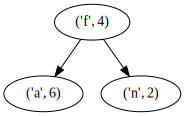

In [53]:
# create treap
treap = Treap()
treap.insert(4, 'f', 4)
treap.insert(2, 'n', 2)
treap.insert(6, 'a', 6)

# visualize the tree
src = visualize_tree(treap.root)
src